# Options

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

### Notation 

$K \hspace{10mm} \text{the strike price of an option}\\$

$S \hspace{10mm} \text{the price of the underlying}\\$

$ payoff(call)= \max (S - K,0) \\$

$ payoff(put) = \max(K - S, 0)$

In [2]:
def payoff_call(sT,x):
    return max(0, sT - x)

In [3]:
payoff_call(20,30)

0

In [4]:
payoff_call(30,20)

10

Grafico dei payoff

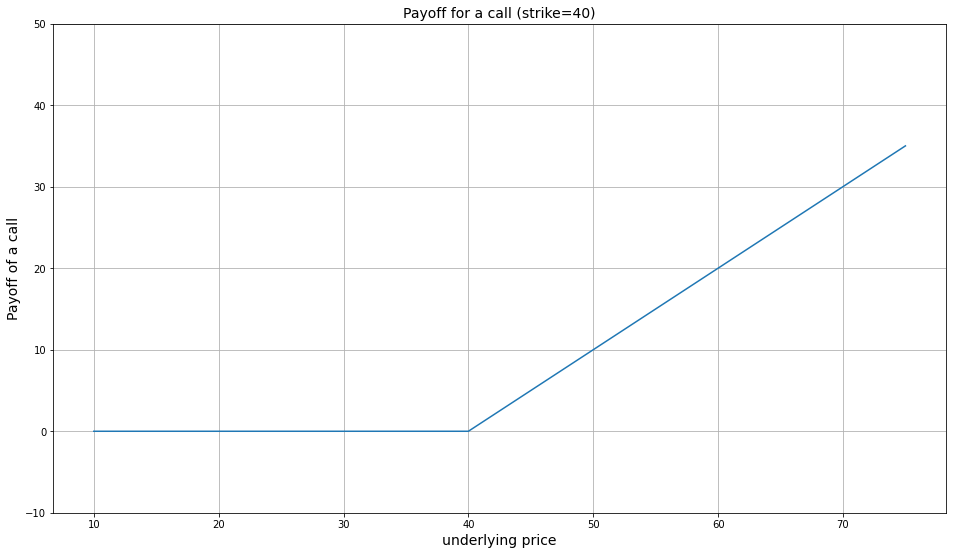

In [5]:
font = {'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

s = np.arange(10,80,5)
x=40
payoff=(abs(s-x)+s-x)/2
plt.figure(figsize=(16,9))
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a call (strike=40)", fontdict=font)
plt.xlabel("underlying price", fontdict=font)
plt.ylabel("Payoff of a call", fontdict=font)
plt.grid(True)
plt.savefig('results/payoff_call.png', dpi=300)
plt.show()

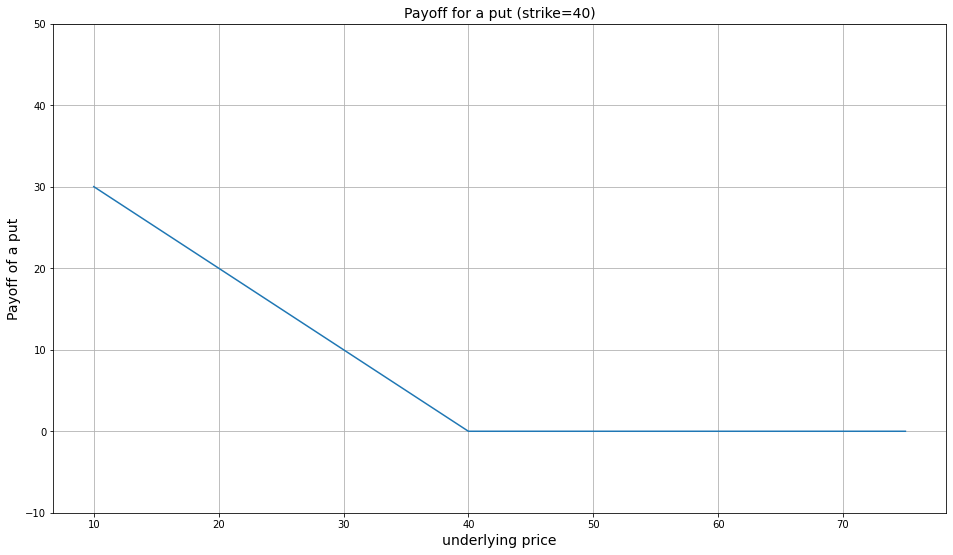

In [6]:
s = np.arange(10,80,5)
x=40
payoff=(abs(x-s)+x-s)/2
plt.figure(figsize=(16,9))
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a put (strike=40)", fontdict=font)
plt.xlabel("underlying price", fontdict=font)
plt.ylabel("Payoff of a put", fontdict=font)
plt.grid(True)
plt.savefig('results/payoff_put.png', dpi=300)
plt.show()

####  Profit and loss from the buying and selling of a call option

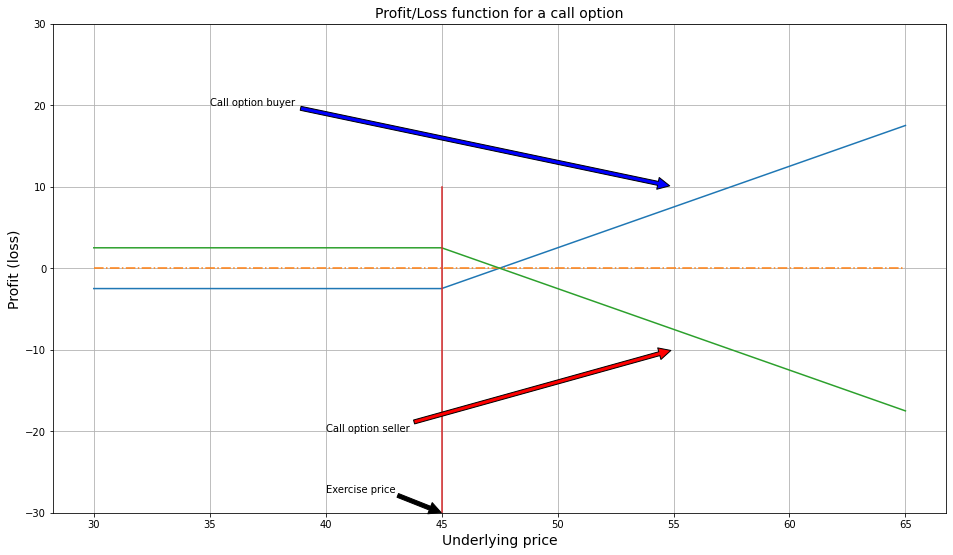

In [7]:
s = np.arange(30,70,5)
x=45;c=2.5
y=(abs(s-x)+s-x)/2 -c
y2=np.zeros(len(s))
x3=[x, x]
y3=[-30,10]
plt.figure(figsize = (16,9))
plt.ylim(-30,30)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.plot(x3,y3)
plt.title("Profit/Loss function for a call option", fontdict=font)
plt.xlabel('Underlying price', fontdict=font)
plt.ylabel('Profit (loss)', fontdict=font)
plt.annotate('Call option buyer', xy=(55,10), xytext=(35,20),
             arrowprops=dict(facecolor='blue',shrink=0.01))
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20),
             arrowprops=dict(facecolor='red',shrink=0.01))
plt.annotate('Exercise price', xy=(45,-30), xytext=(40,-27.5), 
             arrowprops=dict(facecolor='black',shrink=0.01))
plt.grid(True)
plt.savefig('results/pl_call.png', dpi=300)
plt.show()

####  Profit and loss from the buying and selling of a put option

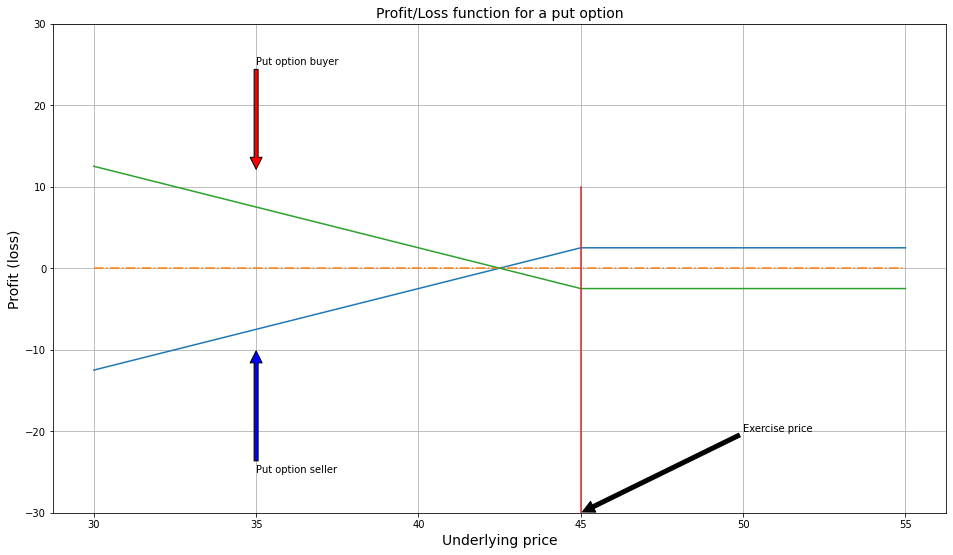

In [8]:
s = np.arange(30,60,5)
x=45;p=2;c=2.5
y=c-(abs(x-s)+x-s)/2 
y2=np.zeros(len(s))
plt.figure(figsize = (16,9))
x3=[x, x]
y3=[-30,10]
plt.ylim(-30,30)
plt.plot(s,y) 
plt.plot(s,y2,'-.') 
plt.plot(s,-y) 
plt.plot(x3,y3)
plt.title("Profit/Loss function for a put option", fontdict=font) 
plt.xlabel('Underlying price', fontdict=font)
plt.ylabel('Profit (loss)', fontdict=font)
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,25), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Exercise price', xy=(45,-30), xytext=(50,-20), arrowprops=dict(facecolor='black',shrink=0.01),)
plt.grid(True)
plt.savefig('results/pl_put.png', dpi=300)
plt.show()

## Black-Scholes-Merton Model

$$f_{c}=S_{0}\ N(d_1)-Ke^{-rT}\ N(d_2),$$
$$f_p = Ke^{-rT}\ N (-d_2)-S_0\ N(-d_1),$$
 
where,
 
$$ d_1 = \frac{log(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt(T)}$$
$$ d_2 = \frac{log(S_0/K)+(r-\sigma^2/2)T}{\sigma\sqrt(T)}=d_1-\sigma\sqrt{T}$$
 


In [9]:
def get_d1(S, X, T, t, r, sigma):
    return (np.log(S/X) + (r + sigma*sigma/2.)* (T - t)) / (sigma * np.sqrt(T - t))

def get_d2(S, X, T, t, r, sigma):
    d1 = get_d1(S, X, T, t, r, sigma)
    return d1 - sigma * np.sqrt(T - t)

In [10]:
from scipy import log,exp,sqrt,stats 

def bs_call(S,X,T,r,sigma):
    d1 = (np.log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T)) 
    d2 = d1-sigma*np.sqrt(T)
    return S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2)

In [11]:
def blackScholes(r, S, K, T, sigma, type = "C"):
    d1 = get_d1(S, K, T, 0, r, sigma)
    d2 = get_d2(S, K, T, 0, r, sigma)
    if type == "C":
        price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
    elif type == "P":
        price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
    return price

In [12]:
c = bs_call(100., 105., 0.5, 0.015, 0.20)
round(c, 3)

3.891

## Options Greeks

### Delta
### $\Delta = \delta V / \delta S$

In [13]:
def delta1(S, X, T, t, r, sigma):
    return stats.norm.cdf(get_d1(S, X, T, t, r, sigma))

In [14]:
delta1(40, 40, 0.1, 0.0, 0.015, 0.2)

0.5220661460645384

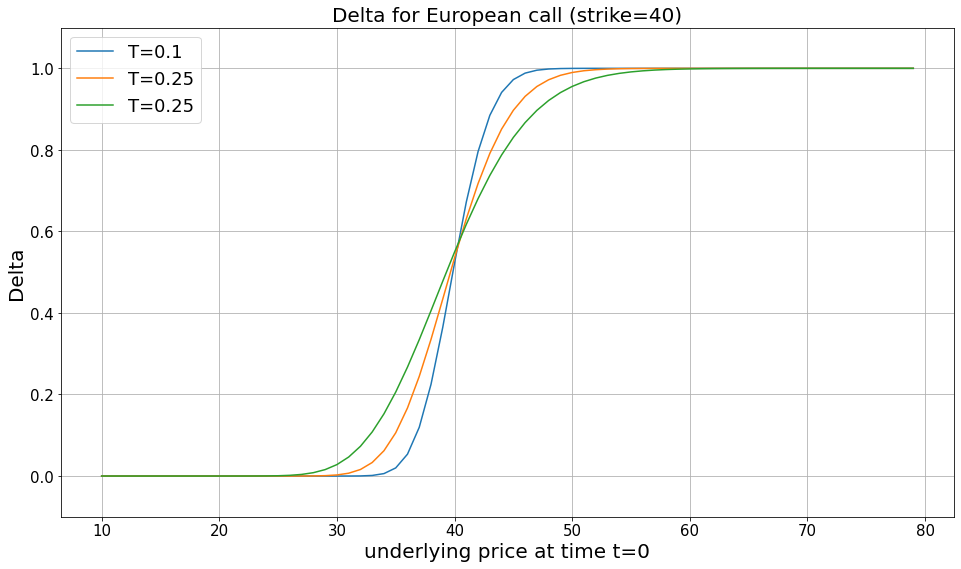

In [15]:
t = 0.0
T_1 = 0.1
T_2 = 0.25
T_3 = 0.5
r = 0.015
sigma = 0.2
s = np.arange(10, 80, 1)
x = 40
font['size'] = 20
deltas_1 = [delta1(p, x, T_1, t, r, sigma) for p in s]
deltas_2 = [delta1(p, x, T_2, t, r, sigma) for p in s]
deltas_3 = [delta1(p, x, T_3, t, r, sigma) for p in s]
plt.figure(figsize=(16, 9))
plt.ylim(-0.1, 1.1)
plt.plot(s, deltas_1, label=f'T={T_1}')
plt.plot(s, deltas_2, label=f'T={T_2}')
plt.plot(s, deltas_3, label=f'T={T_3}')
plt.title("Delta for European call (strike=40)", fontdict=font)
plt.xlabel("underlying price at time t=0", fontdict=font)
plt.ylabel("Delta", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/delta_call_var_price.png', dpi=300)
plt.show()

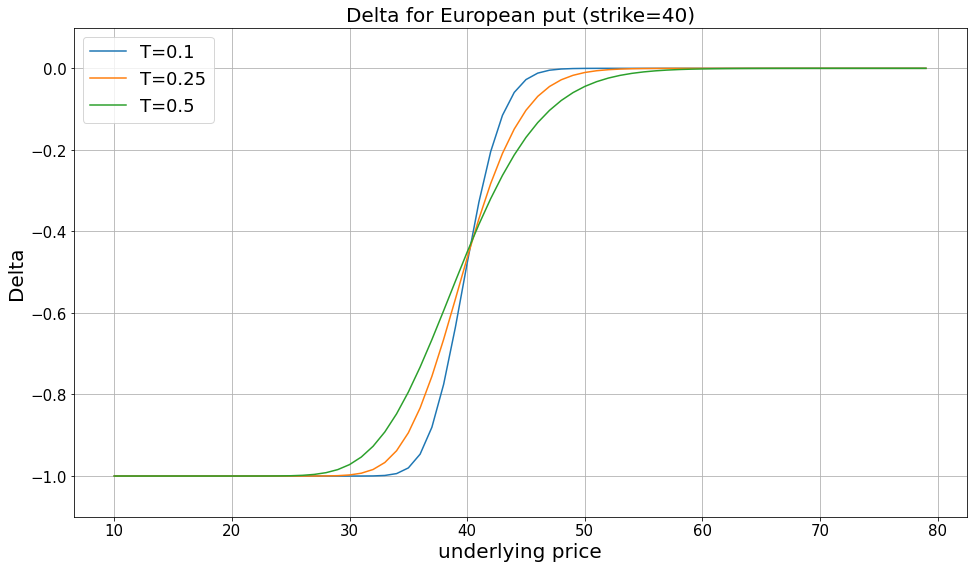

In [16]:
deltas_1 = [delta1(p, x, T_1, t, r, sigma) - 1 for p in s]
deltas_2 = [delta1(p, x, T_2, t, r, sigma) - 1 for p in s]
deltas_3 = [delta1(p, x, T_3, t, r, sigma) - 1 for p in s]
plt.figure(figsize=(16, 9))
plt.ylim(-1.1, 0.1)
plt.plot(s, deltas_1, label=f'T={T_1}')
plt.plot(s, deltas_2, label=f'T={T_2}')
plt.plot(s, deltas_3, label=f'T={T_3}')
plt.title("Delta for European put (strike=40)", fontdict=font)
plt.xlabel("underlying price", fontdict=font)
plt.ylabel("Delta", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/delta_put_var_price.png', dpi=300)
plt.show()

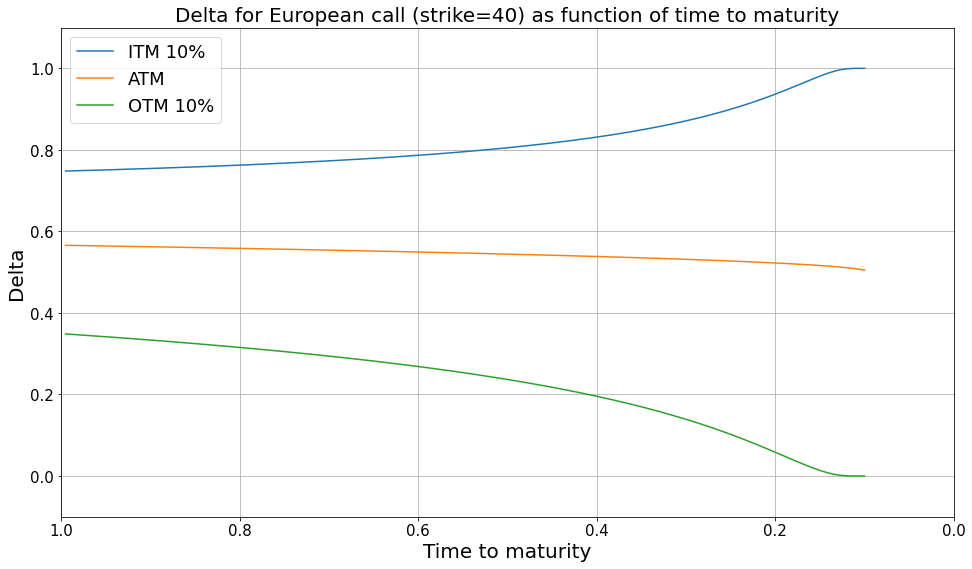

In [17]:
times = np.arange(0.1, 1, 0.005)
deltas_1 = [delta1(x*1.1, x, 1, t_, r, sigma) for t_ in times]
deltas_2 = [delta1(x, x, 1, t_, r, sigma) for t_ in times]
deltas_3 = [delta1(x*0.9, x, 1, t_, r, sigma) for t_ in times]
plt.figure(figsize=(16, 9))
plt.ylim(-0.1, 1.1)
plt.xlim(1, 0)
plt.plot(times, deltas_1[::-1], label=f'ITM 10%')
plt.plot(times, deltas_2[::-1], label=f'ATM')
plt.plot(times, deltas_3[::-1], label=f'OTM 10%')
plt.title("Delta for European call (strike=40) as function of time to maturity", fontdict=font)
plt.xlabel("Time to maturity", fontdict=font)
plt.ylabel("Delta", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/delta_call_var_time.png', dpi=300)
plt.show()

### Gamma 
### $\Gamma = \delta^2 V / \delta S^2$

In [18]:
def gamma(S, X, T, t, r, sigma):
    d1 = get_d1(S, X, T, t, r, sigma)
    return stats.norm.pdf(d1) / (S * sigma * np.sqrt(T - t))

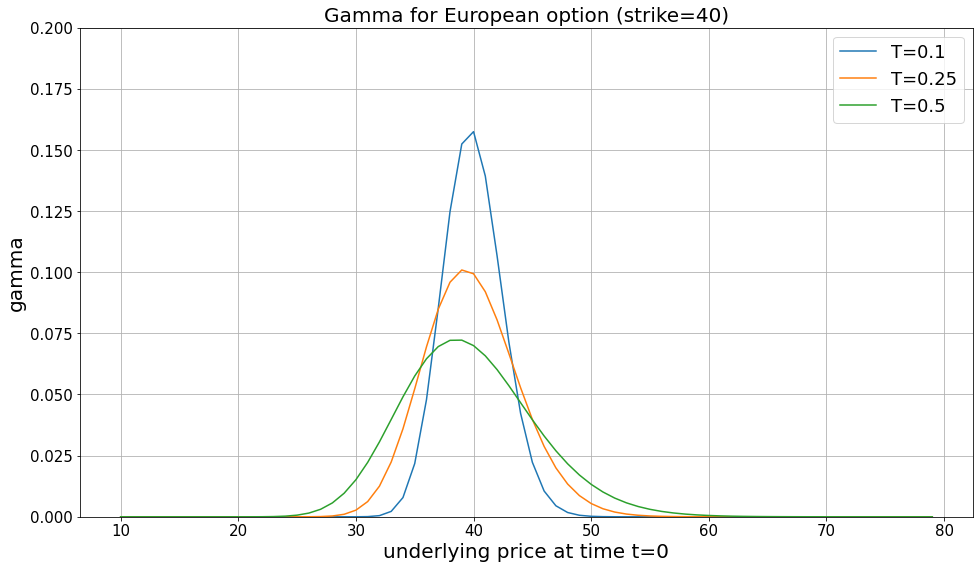

In [19]:
gammas_1 = [gamma(p, x, T_1, t, r, sigma) for p in s]
gammas_2 = [gamma(p, x, T_2, t, r, sigma) for p in s]
gammas_3 = [gamma(p, x, T_3, t, r, sigma) for p in s]
plt.figure(figsize=(16, 9))
plt.ylim(0, 0.2)
plt.plot(s, gammas_1, label=f'T={T_1}')
plt.plot(s, gammas_2, label=f'T={T_2}')
plt.plot(s, gammas_3, label=f'T={T_3}')
plt.title("Gamma for European option (strike=40)", fontdict=font)
plt.xlabel("underlying price at time t=0", fontdict=font)
plt.ylabel("gamma", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/gamma_opt_var_price.png', dpi=300)
plt.show()

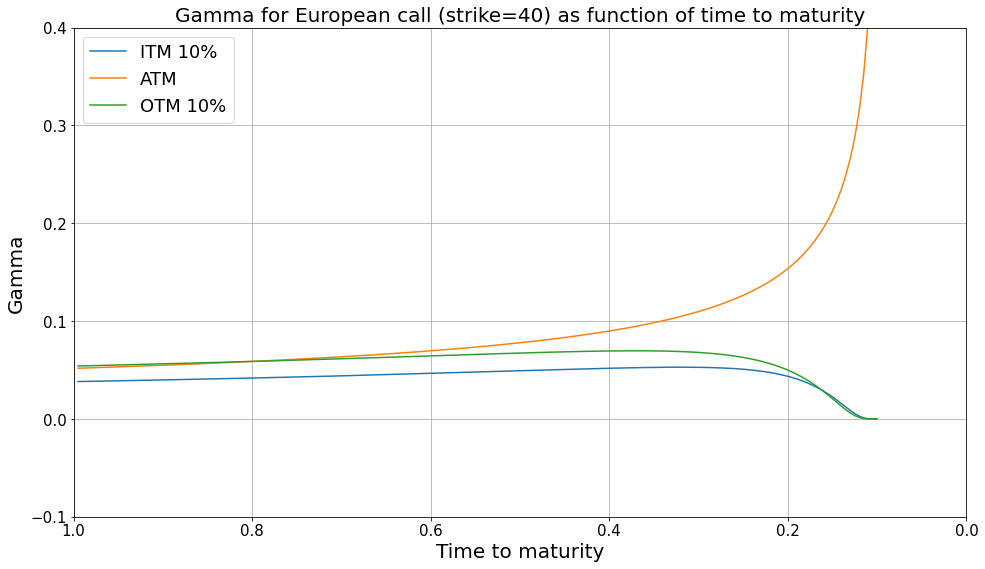

In [20]:
gammas_1 = [gamma(x*1.1, x, 1, t_, r, sigma) for t_ in times]
gammas_2 = [gamma(x, x, 1, t_, r, sigma) for t_ in times]
gammas_3 = [gamma(x*0.9, x, 1, t_, r, sigma) for t_ in times]
plt.figure(figsize=(16, 9))
plt.ylim(-0.1, 0.4)
plt.xlim(1, 0)
plt.plot(times, gammas_1[::-1], label=f'ITM 10%')
plt.plot(times, gammas_2[::-1], label=f'ATM')
plt.plot(times, gammas_3[::-1], label=f'OTM 10%')
plt.title("Gamma for European call (strike=40) as function of time to maturity", fontdict=font)
plt.xlabel("Time to maturity", fontdict=font)
plt.ylabel("Gamma", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/gamma_call_var_time.png', dpi=300)
plt.show()

### Vega

### $\mathcal{V} = \frac{\delta V}{\delta \sigma}$

In [21]:
def vega(S, X, T, t, r, sigma):
    d1 = get_d1(S, X, T, t, r, sigma)
    return S * stats.norm.pdf(d1) * np.sqrt(T - t)

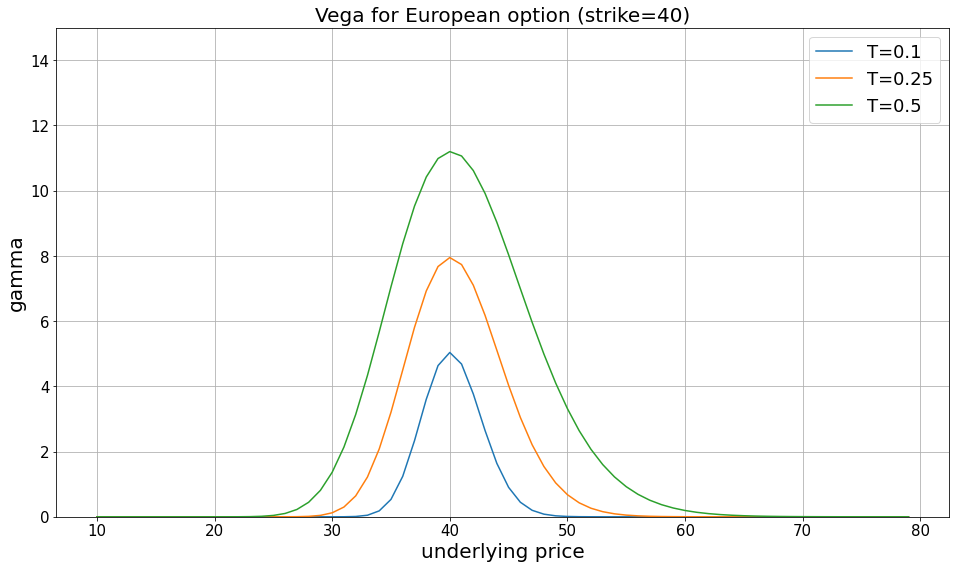

In [22]:
vegas_1 = [vega(p, x, T_1, t, r, sigma) for p in s]
vegas_2 = [vega(p, x, T_2, t, r, sigma) for p in s]
vegas_3 = [vega(p, x, T_3, t, r, sigma) for p in s]
plt.figure(figsize=(16, 9))
plt.ylim(0, 15)
plt.plot(s, vegas_1, label=f'T={T_1}')
plt.plot(s, vegas_2, label=f'T={T_2}')
plt.plot(s, vegas_3, label=f'T={T_3}')
plt.title("Vega for European option (strike=40)", fontdict=font)
plt.xlabel("underlying price", fontdict=font)
plt.ylabel("gamma", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/vega_opt_var_price.png', dpi=300)
plt.show()

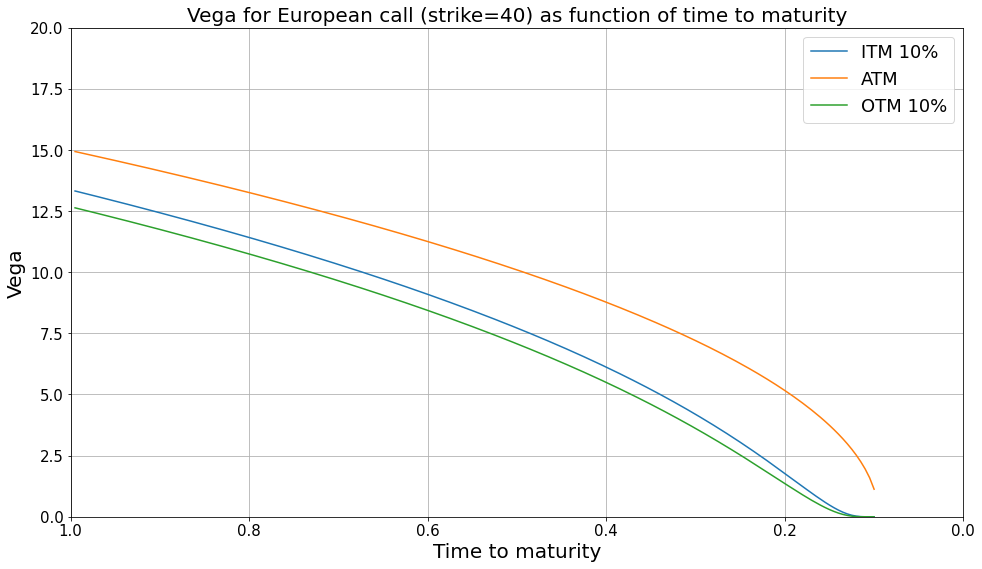

In [23]:
vegas_1 = [vega(x*1.1, x, 1, t_, r, sigma) for t_ in times]
vegas_2 = [vega(x, x, 1, t_, r, sigma) for t_ in times]
vegas_3 = [vega(x*0.9, x, 1, t_, r, sigma) for t_ in times]
plt.figure(figsize=(16, 9))
plt.ylim(0, 20)
plt.xlim(1, 0)
plt.plot(times, vegas_1[::-1], label=f'ITM 10%')
plt.plot(times, vegas_2[::-1], label=f'ATM')
plt.plot(times, vegas_3[::-1], label=f'OTM 10%')
plt.title("Vega for European call (strike=40) as function of time to maturity", fontdict=font)
plt.xlabel("Time to maturity", fontdict=font)
plt.ylabel("Vega", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/vega_opt_var_time.png', dpi=300)
plt.show()

### Theta

### $\Theta = \delta V / \delta t$

In [24]:
def theta(S, X, T, t, r, sigma, kind = 'call'):
    d1 = get_d1(S, X, T, t, r, sigma)
    d2 = get_d2(S, X, T, t, r, sigma)
    tmp_1 = - (S * stats.norm.pdf(d1) * sigma) / (2 * np.sqrt(T - t))
    if kind == 'call':
        return tmp_1 - r * X * np.exp(-r * (T - t)) * stats.norm.cdf(d2)
    else:
        return tmp_1 + r * X * np.exp(-r * (T - t)) * stats.norm.cdf(-d2)

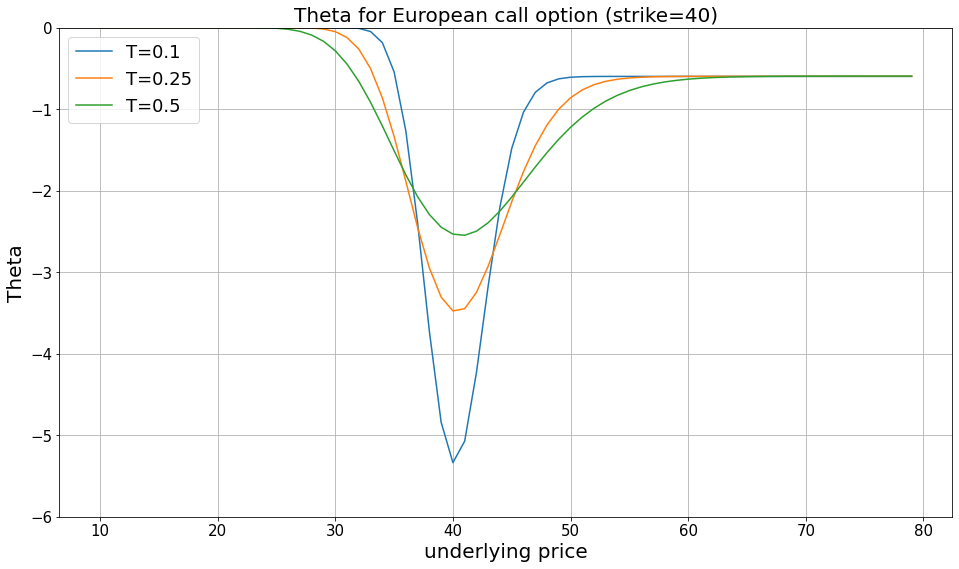

In [25]:
thetas_1 = [theta(p, x, T_1, t, r, sigma) for p in s]
thetas_2 = [theta(p, x, T_2, t, r, sigma) for p in s]
thetas_3 = [theta(p, x, T_3, t, r, sigma) for p in s]
plt.figure(figsize=(16, 9))
plt.ylim(-6, 0.0)
plt.plot(s, thetas_1, label=f'T={T_1}')
plt.plot(s, thetas_2, label=f'T={T_2}')
plt.plot(s, thetas_3, label=f'T={T_3}')
plt.title("Theta for European call option (strike=40)", fontdict=font)
plt.xlabel("underlying price", fontdict=font)
plt.ylabel("Theta", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/theta_call_var_price.png', dpi=300)
plt.show()

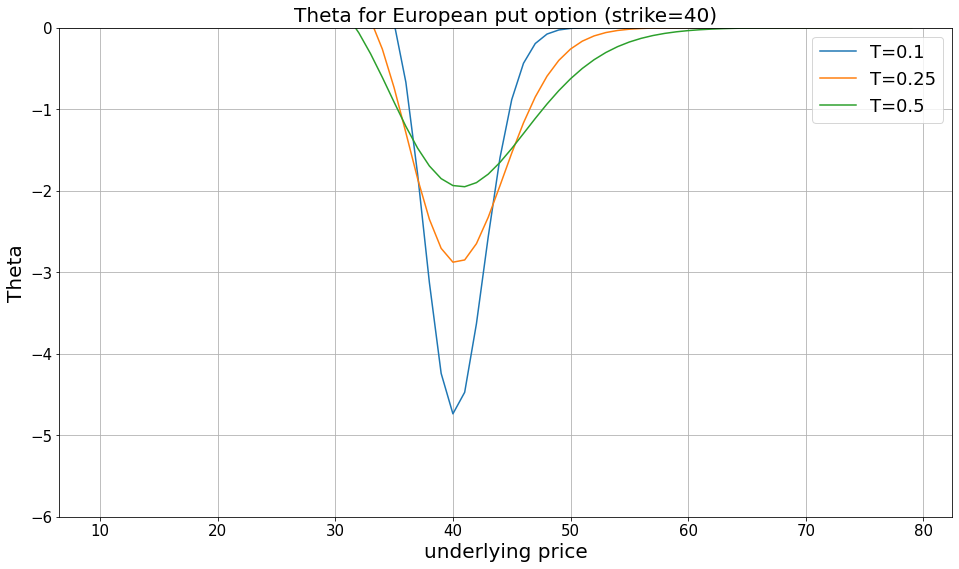

In [26]:
thetas_1 = [theta(p, x, T_1, t, r, sigma, kind='put') for p in s]
thetas_2 = [theta(p, x, T_2, t, r, sigma, kind='put') for p in s]
thetas_3 = [theta(p, x, T_3, t, r, sigma, kind='put') for p in s]
plt.figure(figsize=(16, 9))
plt.ylim(-6, 0.0)
plt.plot(s, thetas_1, label=f'T={T_1}')
plt.plot(s, thetas_2, label=f'T={T_2}')
plt.plot(s, thetas_3, label=f'T={T_3}')
plt.title("Theta for European put option (strike=40)", fontdict=font)
plt.xlabel("underlying price", fontdict=font)
plt.ylabel("Theta", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/theta_put_var_price.png', dpi=300)
plt.show()

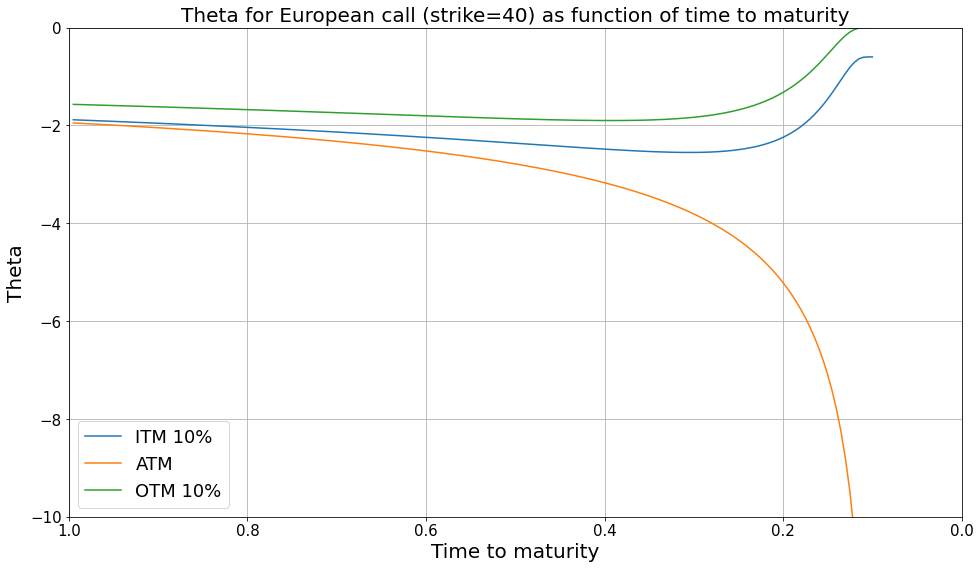

In [27]:
thetas_1 = [theta(x*1.1, x, 1, t_, r, sigma) for t_ in times]
thetas_2 = [theta(x, x, 1, t_, r, sigma) for t_ in times]
thetas_3 = [theta(x*0.9, x, 1, t_, r, sigma) for t_ in times]
plt.figure(figsize=(16, 9))
plt.ylim(-10, 0)
plt.xlim(1, 0)
plt.plot(times, thetas_1[::-1], label=f'ITM 10%')
plt.plot(times, thetas_2[::-1], label=f'ATM')
plt.plot(times, thetas_3[::-1], label=f'OTM 10%')
plt.title("Theta for European call (strike=40) as function of time to maturity", fontdict=font)
plt.xlabel("Time to maturity", fontdict=font)
plt.ylabel("Theta", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/theta_call_var_time.png', dpi=300)
plt.show()

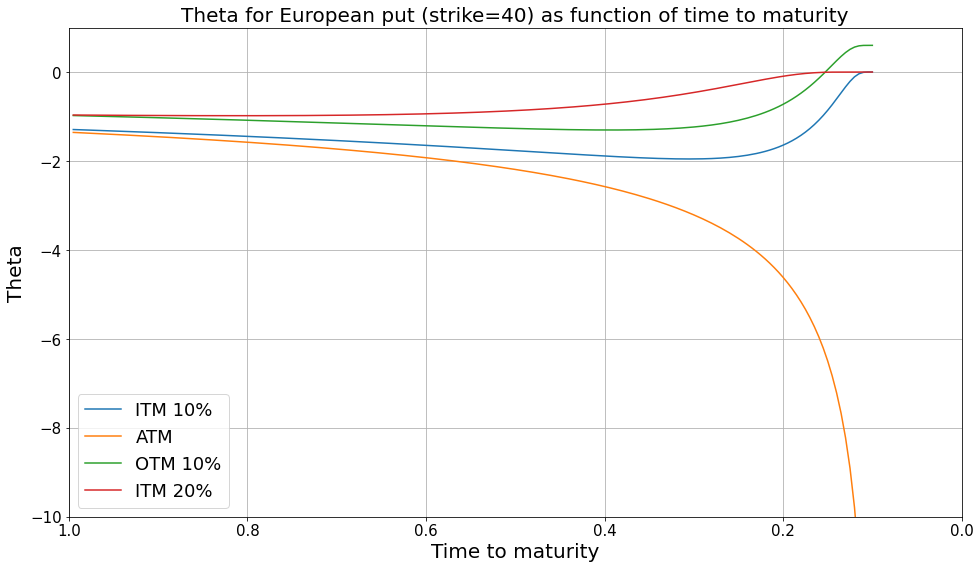

In [28]:
thetas_1 = [theta(x*1.1, x, 1, t_, r, sigma, kind='put') for t_ in times]
thetas_2 = [theta(x, x, 1, t_, r, sigma, kind='put') for t_ in times]
thetas_3 = [theta(x*0.9, x, 1, t_, r, sigma, kind='put') for t_ in times]
thetas_4 = [theta(x*1.2, x, 1, t_, r, sigma, kind='put') for t_ in times]
plt.figure(figsize=(16, 9))
plt.ylim(-10, 1)
plt.xlim(1, 0)
plt.plot(times, thetas_1[::-1], label=f'ITM 10%')
plt.plot(times, thetas_2[::-1], label=f'ATM')
plt.plot(times, thetas_3[::-1], label=f'OTM 10%')
plt.plot(times, thetas_4[::-1], label=f'ITM 20%')
plt.title("Theta for European put (strike=40) as function of time to maturity", fontdict=font)
plt.xlabel("Time to maturity", fontdict=font)
plt.ylabel("Theta", fontdict=font)
plt.grid(True)
plt.legend(prop={'size': 18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('results/theta_put_var_time.png', dpi=300)
plt.show()

### Put call parity

Il prezzo della call più il valore attuale del prezzo di esercizio è uguale al prezzo della put più il valore corrente dell'azione

$$ C + Xe^{-rT} = P + S $$


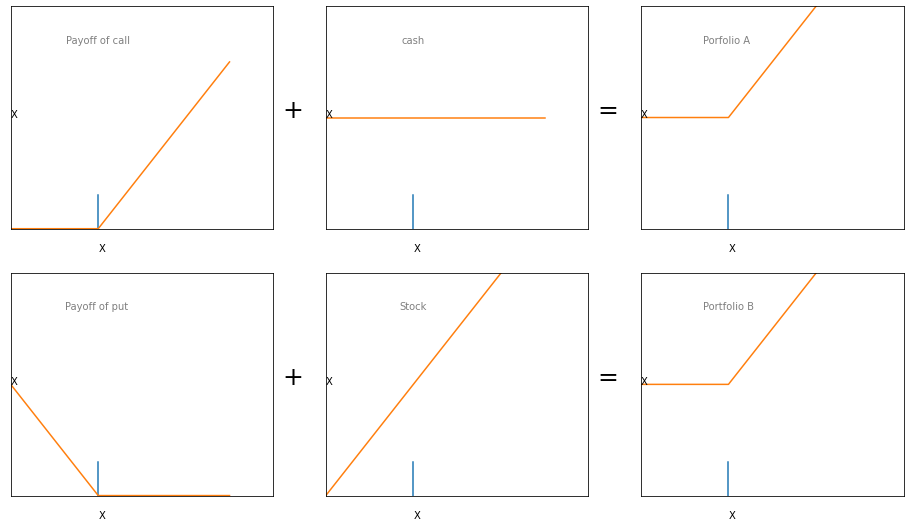

In [29]:
import pylab as pl 
import numpy as np 
x=10
sT=np.arange(0,30,5) 
payoff_call=(abs(sT-x)+sT-x)/2 
payoff_put=(abs(x-sT)+x-sT)/2 
cash=np.zeros(len(sT))+x

def graph(text,text2=''): 
    pl.xticks(())
    pl.yticks(())
    pl.xlim(0,30)
    pl.ylim(0,20) 
    pl.plot([x,x],[0,3])
    pl.text(x,-2,"X");
    pl.text(0,x,"X")
    pl.text(x,x*1.7, text, ha='center', va='center',size=10, alpha=.5) 
    pl.text(-5,10,text2,size=25)
    
pl.figure(figsize=(16, 9))
pl.subplot(2, 3, 1); graph('Payoff of call');	   pl.plot(sT,payoff_call) 
pl.subplot(2, 3, 2); graph('cash','+');	         pl.plot(sT,cash)
pl.subplot(2, 3, 3); graph('Porfolio A ','=');   pl.plot(sT,cash+payoff_call)
pl.subplot(2, 3, 4); graph('Payoff of put ');	   pl.plot(sT,payoff_put) 
pl.subplot(2, 3, 5); graph('Stock','+');	   pl.plot(sT,sT)
pl.subplot(2, 3, 6); graph('Portfolio B','=');   pl.plot(sT,sT+payoff_put) 
pl.show()


Parametri iniziali

In [30]:
r = 0.01
S = 35
K = 40
T = 1
sigma = 0.30

Funzione Black Scholes

In [31]:
def blackScholes(r, S, K, T, sigma, type = "C"):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "C":
            price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
        elif type == "P":
            price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    
    except:
        print("Please confirm all option parameters above")

In [32]:
P = blackScholes(r, S, K, T, sigma, type = "C")
P

2.515055958704906

### Implied volatility

In [33]:
def iv_newton_raphson(S, X, T, r, C):
    iv = np.sqrt(2 * np.pi / T) * (C / S)
    e = 0.0001
    
    for i in range(2000):
        iv = iv + ((C - blackScholes(r, S, X, T, iv, type='C'))/ vega(S, X, T, 0, r, iv))
        delta = abs(blackScholes(r, S, X, T, iv, type='C') - C)
        if delta < e:
            break
            
    return iv

In [34]:
def implied_vol_call(S,X,T,r,c):
    
    sigma, diff = 0, 0
    
    for i in range(3000):
        sigma = 0.005 * (i + 1)
        d1 = (np.log(S/X) + (r + sigma * sigma /2.) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        diff = c - (S * stats.norm.cdf(d1) - X * np.exp(-r * T) * stats.norm.cdf(d2))
        if abs(diff) <= 0.01:
            return i, sigma, diff
        
    return i, sigma, diff

In [35]:
implied_vol_call(40, 40, 0.5, 0.05, 3.3)

(49, 0.25, -0.004006079737288282)

In [53]:
iv_newton_raphson(40, 39, 0.1, 0.05, 2)

0.26513773633891374

In [150]:
help(blackScholes)

Help on function blackScholes in module __main__:

blackScholes(r, S, K, T, sigma, type='C')



In [37]:
blackScholes(0.05, 40, 40, 0.25, 0.2)

1.845998851841145

In [76]:
x_ = np.linspace(20, 60, 50)
y_ = np.linspace(0.05, 1.0, 50)

s = np.outer(x_, np.ones(50))
t = np.outer(y_, np.ones(50)).T

# x = np.array([implied_vol_call() for p in s])

In [77]:
sdfsdfsdf

NameError: name 'sdfsdfsdf' is not defined

In [ ]:
from itertools import product

iv = np.zeros((100, 100))
k, w = 0, 0

for i, j in product(x_, y_):
    try:
        _, vol, _ = implied_vol_call(i, 40, j, 0.05, 3.3)
    except TypeError:
        print(i, j)
        break
    
    iv[k, w] = vol
    w += 1
    if w == 100:
        w = 0
        k += 1

In [ ]:
iv

In [ ]:
s

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
x = np.outer(np.linspace(-2, 2, 10), np.ones(10))
y = x.copy().T
z = x ** 2 + y ** 2
 
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
x = np.outer(np.linspace(-2, 2, 50), np.ones(50))
y = x.copy().T
z = x ** 2 + y ** 2
 
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(s, t, iv, cmap ='viridis', edgecolor ='green')
ax.set_title('x ** 2 + y ** 2')
plt.show()